In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70303 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17582 files belonging to 38 classes.


In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [7]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [9]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1077s 486ms/step - loss: 1.3433 - accuracy: 0.6028 - val_loss: 0.4832 - val_accuracy: 0.8487
Epoch 2/10
2197/2197 [==============================] - 930s 423ms/step - loss: 0.4219 - accuracy: 0.8656 - val_loss: 0.2970 - val_accuracy: 0.9034
Epoch 3/10
2197/2197 [==============================] - 926s 421ms/step - loss: 0.2558 - accuracy: 0.9185 - val_loss: 0.2342 - val_accuracy: 0.9240
Epoch 4/10
2197/2197 [==============================] - 929s 422ms/step - loss: 0.1791 - accuracy: 0.9412 - val_loss: 0.2096 - val_accuracy: 0.9322
Epoch 5/10
2197/2197 [==============================] - 921s 419ms/step - loss: 0.1324 - accuracy: 0.9558 - val_loss: 0.1201 - val_accuracy: 0.9612
Epoch 6/10
2197/2197 [==============================] - 924s 420ms/step - loss: 0.1026 - accuracy: 0.9657 - val_loss: 0.1570 - val_accuracy: 0.9531
Epoch 7/10
2197/2197 [==============================] - 924s 420ms/step - loss: 0.0857 - accuracy: 0.9716 - val

In [10]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 204s 93ms/step - loss: 0.0284 - accuracy: 0.9907
Training accuracy: 0.9906973838806152


In [31]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 53s 96ms/step - loss: 0.1168 - accuracy: 0.9642
Validation accuracy: 0.9642247557640076
550/550 [==============================] - 53s 94ms/step - loss: 0.1168 - accuracy: 0.9642
Validation accuracy: 0.9642247557640076


In [33]:
cnn.save('my_model.h5')


In [34]:
training_history.history #Return Dictionary of history

{'loss': [1.3432681560516357,
  0.4219186305999756,
  0.25577402114868164,
  0.1790711134672165,
  0.13235227763652802,
  0.10260998457670212,
  0.08574201166629791,
  0.07477888464927673,
  0.06097163259983063,
  0.05462653189897537],
 'accuracy': [0.6027907729148865,
  0.8656103014945984,
  0.9184672236442566,
  0.9411689639091492,
  0.9558197855949402,
  0.9657055735588074,
  0.9715943932533264,
  0.9757193922996521,
  0.9801857471466064,
  0.9822198152542114],
 'val_loss': [0.4831850826740265,
  0.2969743609428406,
  0.23420806229114532,
  0.2096070796251297,
  0.12006257474422455,
  0.15700706839561462,
  0.10926886647939682,
  0.13525408506393433,
  0.13288699090480804,
  0.11676756292581558],
 'val_accuracy': [0.8486520051956177,
  0.9034239649772644,
  0.9239563345909119,
  0.9322034120559692,
  0.961210310459137,
  0.9530770182609558,
  0.9671823382377625,
  0.9593334197998047,
  0.9617791175842285,
  0.9642247557640076]}

In [35]:

#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [36]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


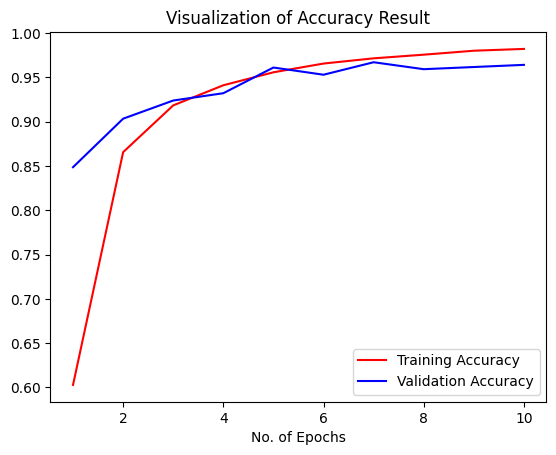

In [37]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [38]:
class_name = validation_set.class_names

In [39]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17582 files belonging to 38 classes.


In [42]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17582/17582 [==============================] - 198s 11ms/step


In [43]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [44]:
Y_true

<tf.Tensor: shape=(17582,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [45]:
predicted_categories

<tf.Tensor: shape=(17582,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [47]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.93      0.96       504
                                 Apple___Black_rot       0.90      1.00      0.95       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.98       440
                                   Apple___healthy       0.89      0.99      0.94       502
                               Blueberry___healthy       0.99      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.99       421
                 Cherry_(including_sour)___healthy       0.95      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.88      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.99      0.

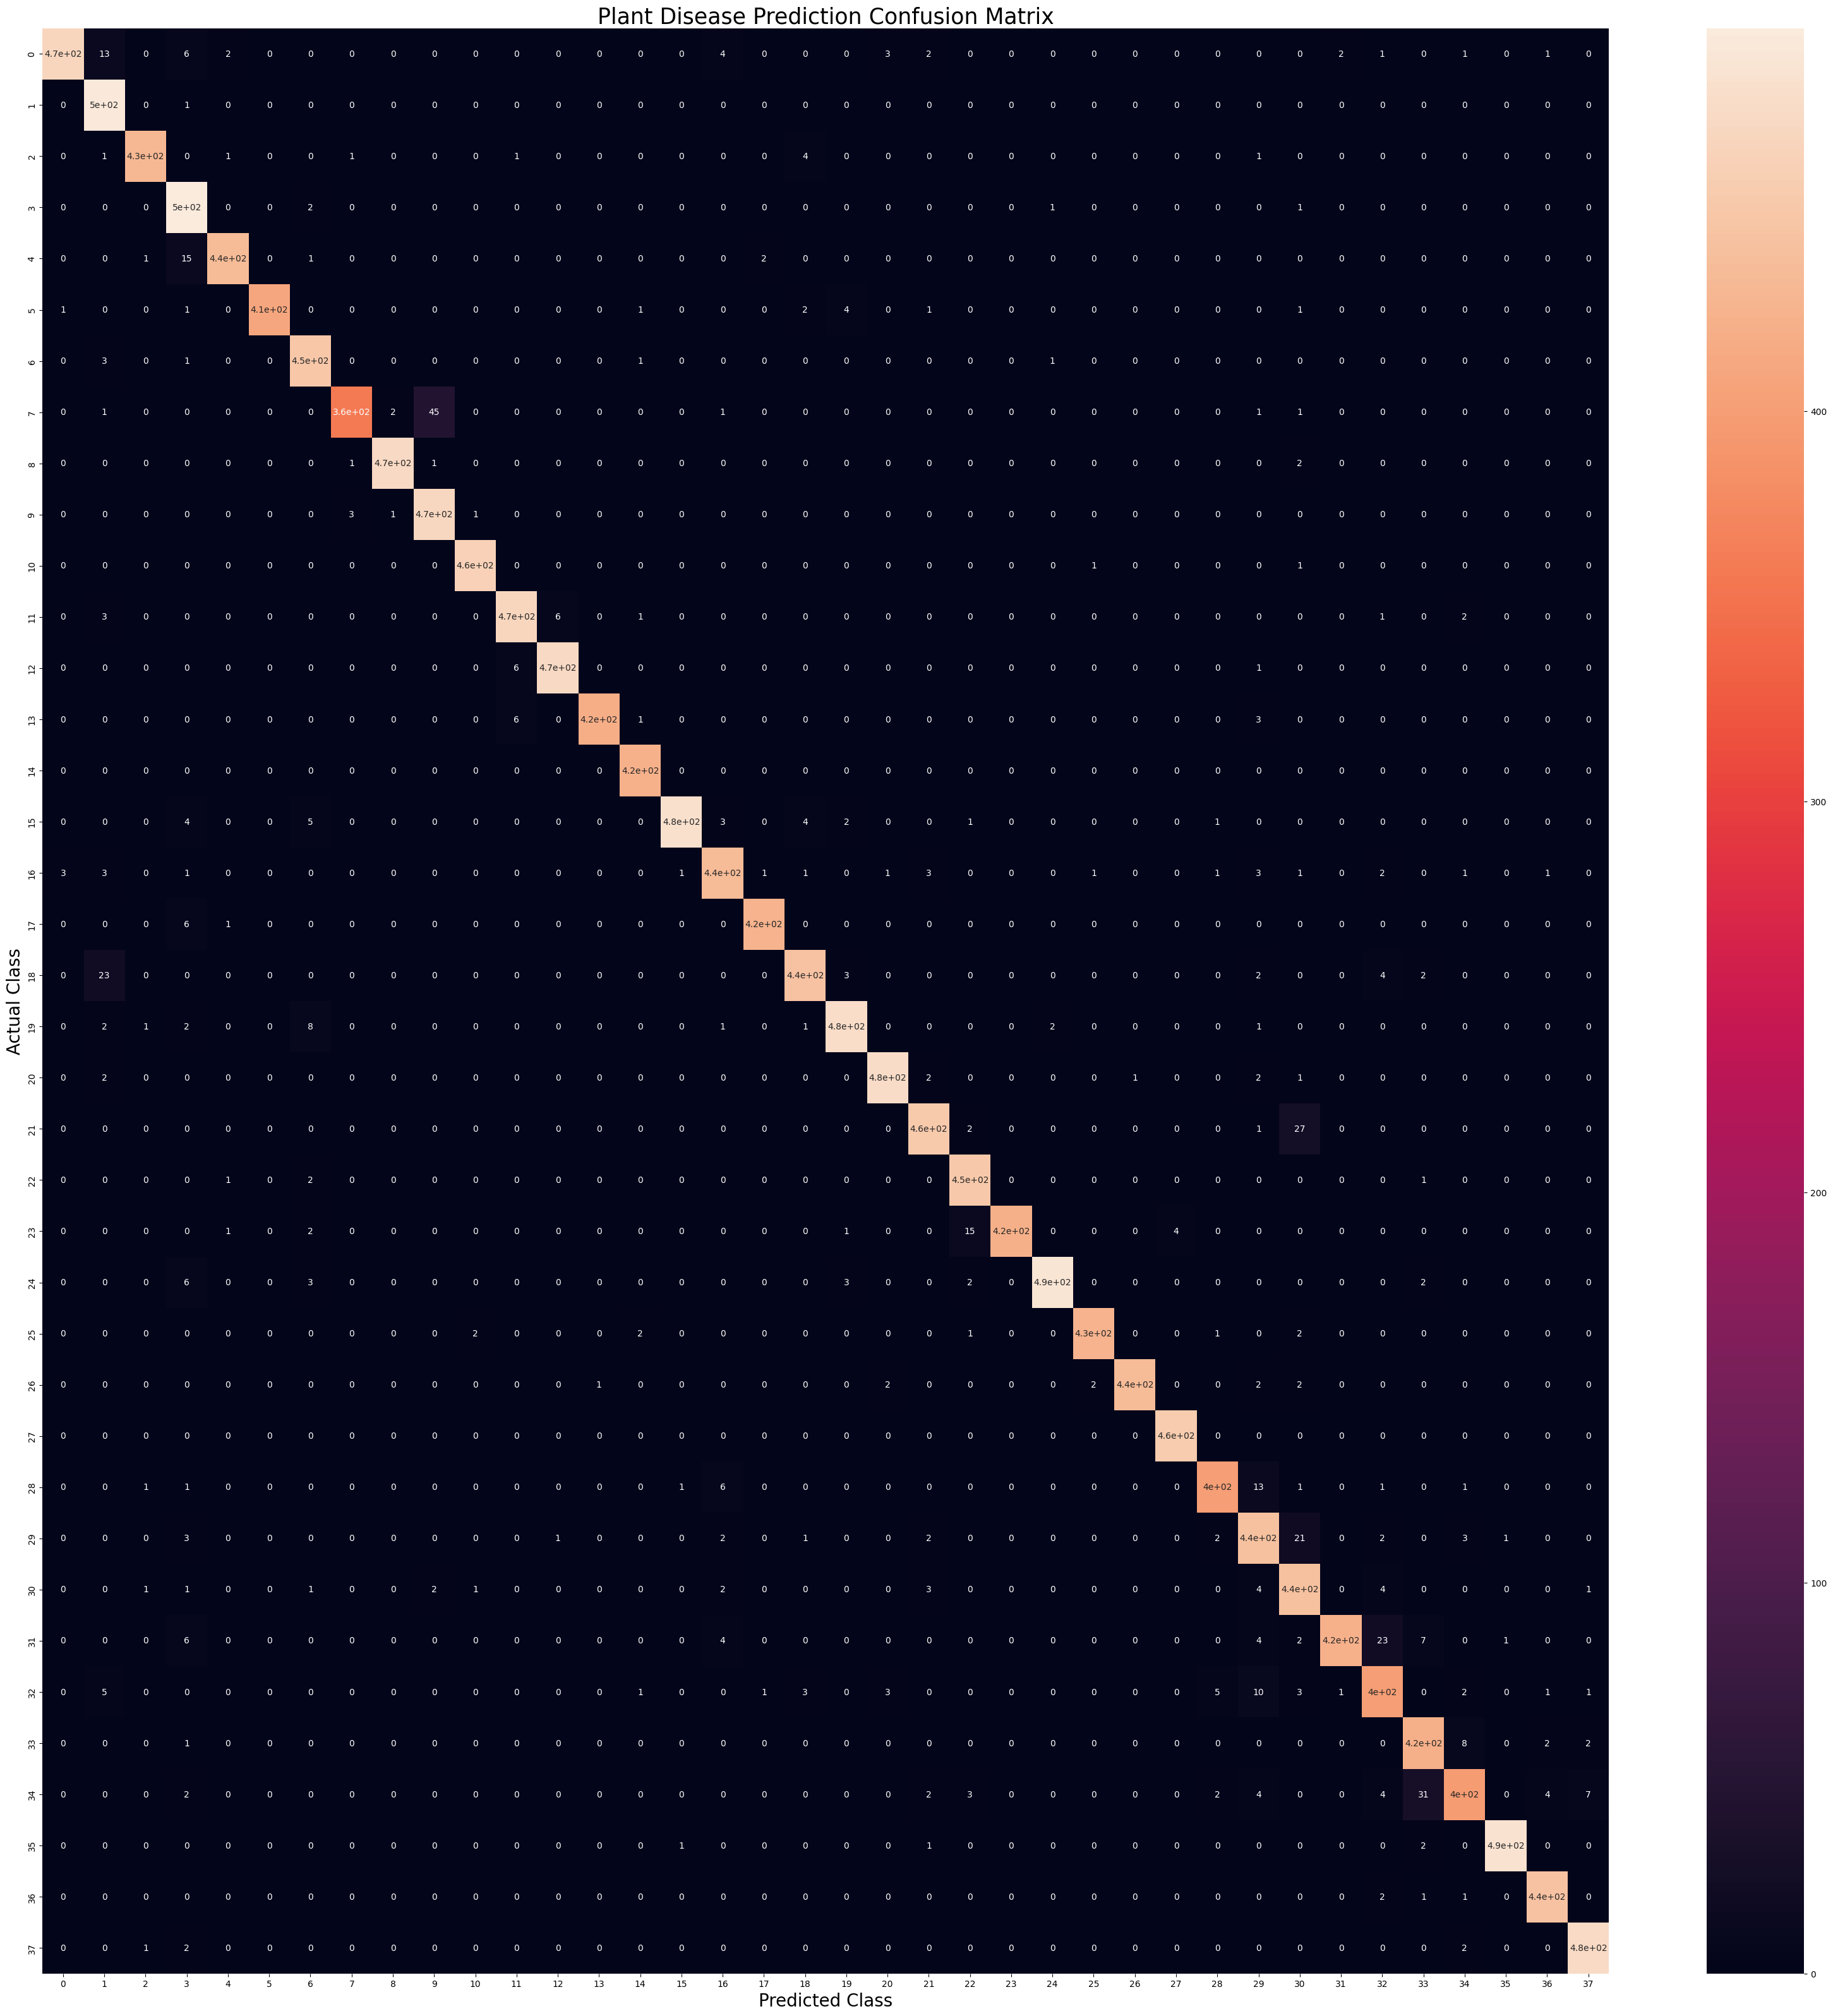

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()